# Receipt OCR notebook series: Problem definition

> Given a arbitrary photo containing a receipt, extract grand total number

![](https://storage.googleapis.com/www.forwardit.lv/kaggle/receipt_home_kaggle.png)

The solution is divided into smaller tasks:

1. **Apply OCR to find all texts within image**
2. **Find grand total as the largest number among recognized texts**

> One should remember that some tasks could be solved with traditional computer vision algorithms

This work aims to address a common pitfall among machine learning practitioners: trying to solve simple problems with the complex tools. 

# About this notebook

* Locating text boxes on the image
* Extracting all the texts from the image
* Obtaining grand total as the largest floating point number among texts

Let's get started!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

Defining helper methods:

In [2]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [3]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

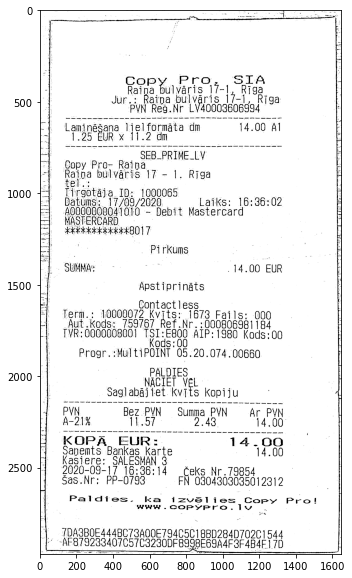

In [4]:
file_name = "/kaggle/input/receipt-ocr-part-1-image-segmentation-by-opencv/result.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

# Step 1: Text box detection

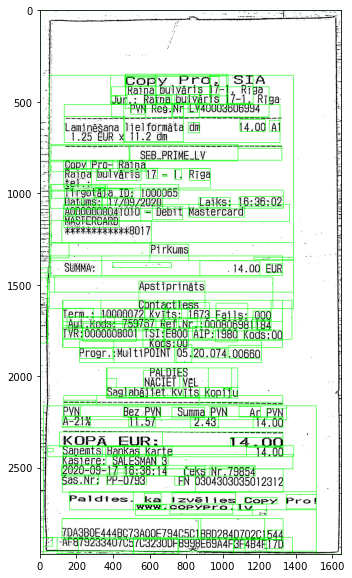

In [5]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

# Step 2: Text recognition

In [6]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

ao a

Cop
Reis Banari I

 

Si a bulVvaris 1
due pi Res, Nr L\ iBiaddidal
Lannegana iit dm 14.00 Al
oe SEBPRIMELV. SSCS
_ Copy Pro- Raina
Raina bulvaris 17 - 1. Riga
| = mis
: ‘aja_ID: 1000065
: l 5. $7709/2020 Laiks: 16:36:02
AO QO000004T010 = Debit Mastercard .
MASTERCARD.
. POHEREAAKEOIT
— _ Pirkums Je
SUMMA - 1.400 EUR
I mperprimats |

ontact les
Term. 10009072 Oy; ts: 7873 Fails: ‘000
Aut.Kods: 75S 767 Ref .Nr.. ‘000806981 184
TVR: ‘6000008001 Tok: E000 AIP: 1980 Kods:00

Progr. -MuiltiPOINT 05. 20.074 00680

- NAGIET Vet _
Sag] abajiet.'kvits Kopiju

i rt tt

PVN Bez-PVYN Summa PYN Ar PYN.
A-21% 11.57 - 2.43. 14.00
KOPA_EUR: 14.00
-. Sanemts: Bankas Karte 14.00 |
Kasiere: SALESMAN 3 - .
2020-09-17 16:36:14 eks Nr.79854
Sas.Nr: PP-0793 F 0304303036012812
Paldtes. ka izvSlies Copy Pro!
Ww . COPYPro. Iv ye
7BASBOE444BC73A00E794C5C1 8RDZe4D70001 544
[/ 2AF8 7928840705 /C3230DF B99BEBIA4F SF 4B4E 1/0 .



# Step 3: Extracting grand total

We will use regular expression to extract all floating point numbers out of the all detected texts.

In [7]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [8]:
amounts = find_amounts(extracted_text)
amounts

[14.0, 11.57, 2.43]

Grand total is the largest one:

In [9]:
max(amounts)

14.0

Feel free to experiment with other regular expressions to find VAT number, company name, date or even read receipt positions!

# Resources

1. [OCR a document, form, or invoice with Tesseract, OpenCV, and Python](https://www.pyimagesearch.com/2020/09/07/ocr-a-document-form-or-invoice-with-tesseract-opencv-and-python/) by Adrian Rosebrock
2. [Text Detection and Extraction using OpenCV and OCR](https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/) by Anandh Jagadeesan
3. [A comprehensive guide to OCR with Tesseract, OpenCV and Python](https://nanonets.com/blog/ocr-with-tesseract/) by Filip Zelic & Anuj Sable